# Finance Data Project 

In [4]:
#import the libraries
import os
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from datetime import datetime
import yfinance as yf
%matplotlib inline

## Data

Analyse equities for the following banks :
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [5]:
#set the date limits
start = '2006-01-01'
end = '2016-01-01'


#fetch the stock price data
BAC = yf.download('BAC', start=start, end=end)

C = yf.download('C', start=start, end=end)

GS = yf.download('GS', start=start, end=end)

JPM = yf.download('JPM', start=start, end=end)

MS = yf.download('MS', start=start, end=end)

WFC = yf.download('WFC', start=start, end=end)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
#list of tickers
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [8]:
#concatenate the ticker data into a single data frame
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [9]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

# EDA


In [10]:
#check the data
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.425446  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  32.081081  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  32.122406  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  32.074192  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  32.094860  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  33.995922  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  34.019238  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  34.112522  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  34.147507  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  34.508980  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.542276  11016400  
2006-01-04   31.530001  19.315601  10870000  
2006-01-05   31.495001  19.294167  10158000  
2006-01-06   31.680000  19.407494   8403800  
2006-01-09   31.674999  19.404430   5619600  

[5 rows x 36 columns]

In [11]:
#get the highest amount of close price
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max().round(2)

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [12]:
bank_stocks.head(1)

Bank Ticker        BAC                                                    \
Stock Info        Open   High        Low      Close  Adj Close    Volume   
Date                                                                       
2006-01-03   46.919998  47.18  46.150002  47.080002  32.425446  16296700   

Bank Ticker      C                                      ...         MS  \
Stock Info    Open        High         Low       Close  ...        Low   
Date                                                    ...              
2006-01-03   490.0  493.799988  481.100006  492.899994  ...  56.740002   

Bank Ticker                                  WFC                        \
Stock Info       Close  Adj Close   Volume  Open    High     Low Close   
Date                                                                     
2006-01-03   58.310001  33.995922  5377000  31.6  31.975  31.195  31.9   

Bank Ticker                       
Stock Info   Adj Close    Volume  
Date                              
2006-01-03   19.542276  11016400  

[1 rows x 36 columns]

In [14]:
#create an empty dataframe for the return percentages
returns = pd.DataFrame()

#get the return percentages from the main data frame
close_df = bank_stocks.xs(key='Close',axis=1,level = 'Stock Info')
close_df

#calculate the percetages through the loop 
for col in close_df.columns:
    if col != 'Date':
        returns[col + ' Returns'] = close_df[col].pct_change()
returns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


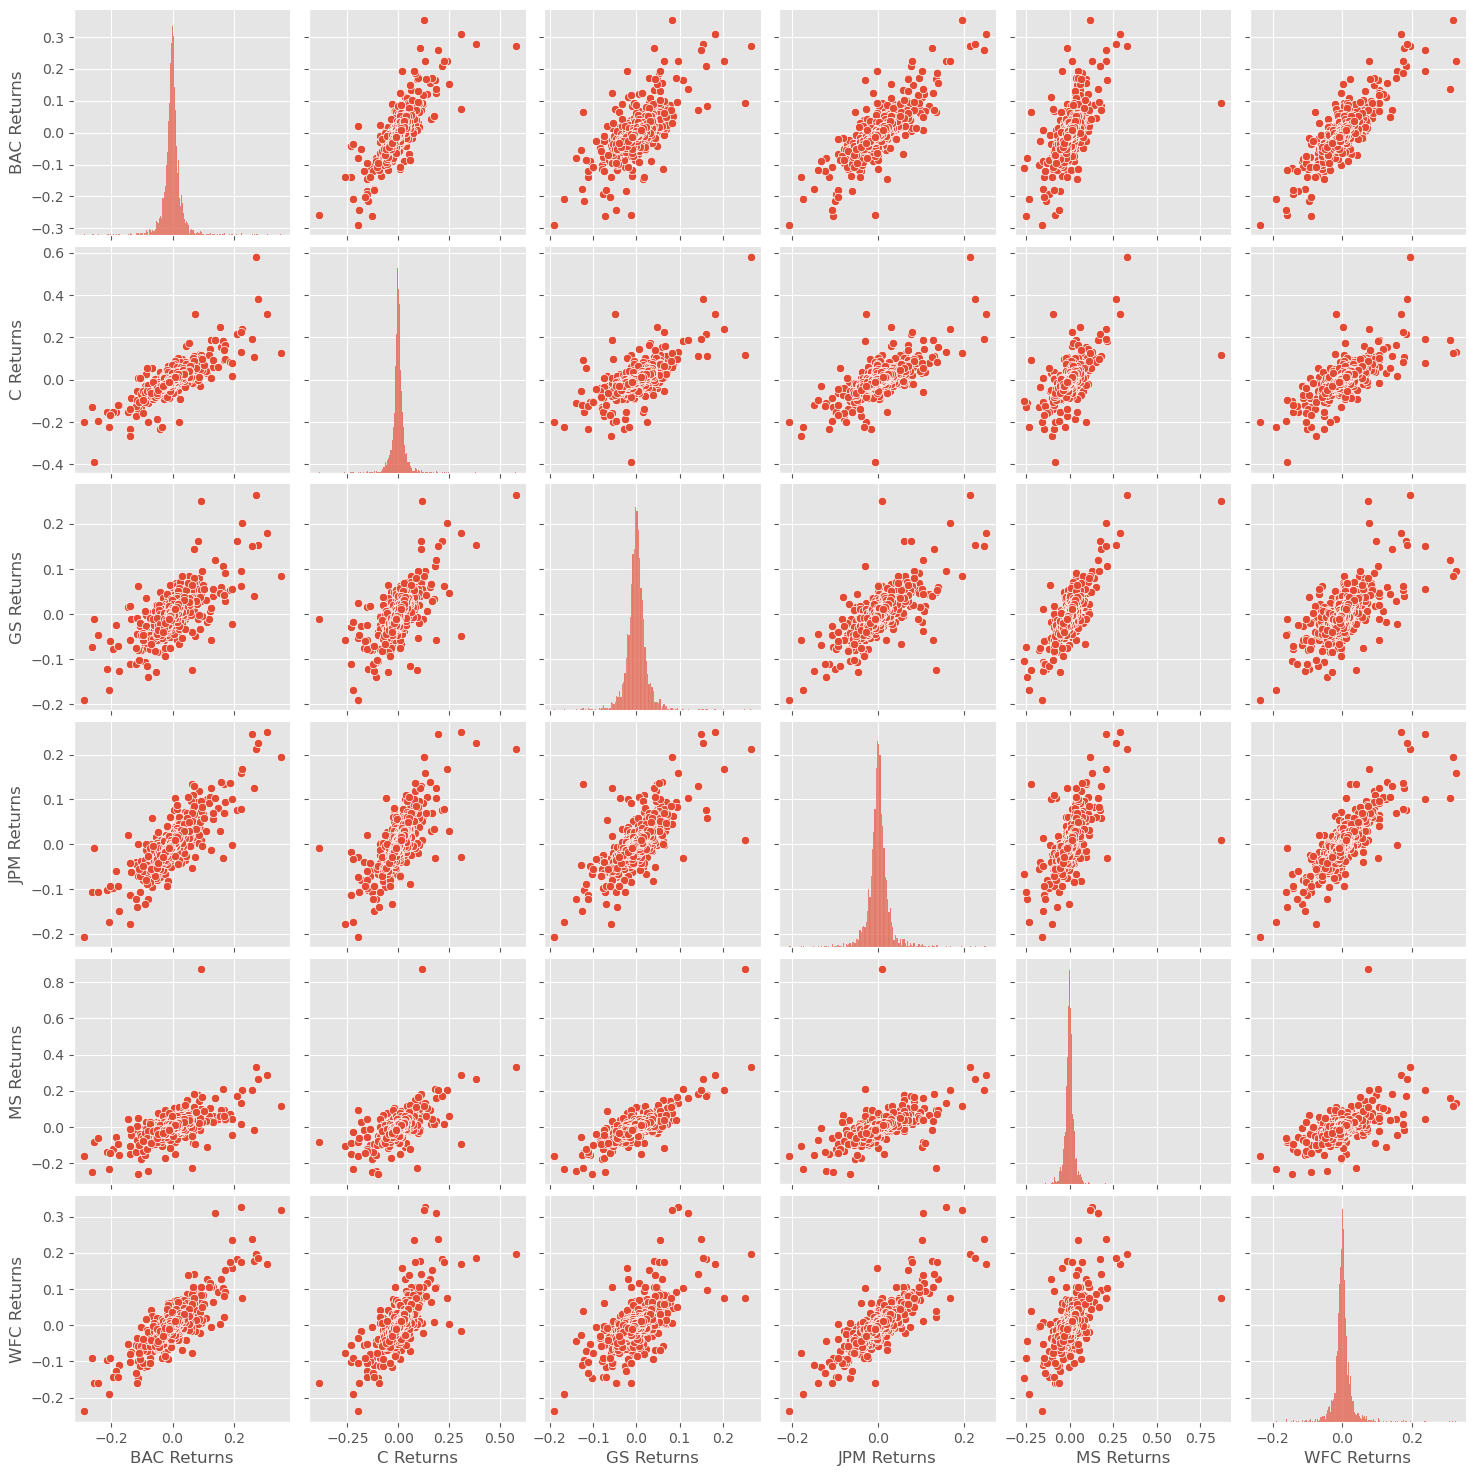

In [20]:
#plot the data through pairplot
sns.pairplot(returns)

In [21]:
returns.head()


,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [22]:
#maxreturns
returns.idxmax()

BAC Returns   2009-04-09
C Returns     2008-11-24
GS Returns    2008-11-24
JPM Returns   2009-01-21
MS Returns    2008-10-13
WFC Returns   2008-07-16
dtype: datetime64[ns]

In [23]:
#min returns
returns.idxmin()

BAC Returns   2009-01-20
C Returns     2009-02-27
GS Returns    2009-01-20
JPM Returns   2009-01-20
MS Returns    2008-10-09
WFC Returns   2009-01-20
dtype: datetime64[ns]

In [24]:
#get the returns std
returns.std()

BAC Returns    0.036647
C Returns      0.038672
GS Returns     0.025390
JPM Returns    0.027667
MS Returns     0.037819
WFC Returns    0.030238
dtype: float64

In [25]:
#2015 returns std
returns['2015-01-01':'2015-12-31'].std()

BAC Returns    0.016163
C Returns      0.015289
GS Returns     0.014046
JPM Returns    0.014017
MS Returns     0.016249
WFC Returns    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

In [26]:
#get 2015 returns for Morgan Stanley
MS_15 = returns['MS Returns']['2015-01-01':'2015-12-31']
MS_15

Date
2015-01-02   -0.002320
2015-01-05   -0.031258
2015-01-06   -0.028800
2015-01-07    0.014278
2015-01-08    0.014889
                ...   
2015-12-24   -0.003681
2015-12-28   -0.009544
2015-12-29    0.011812
2015-12-30   -0.009831
2015-12-31   -0.013031
Name: MS Returns, Length: 252, dtype: float64

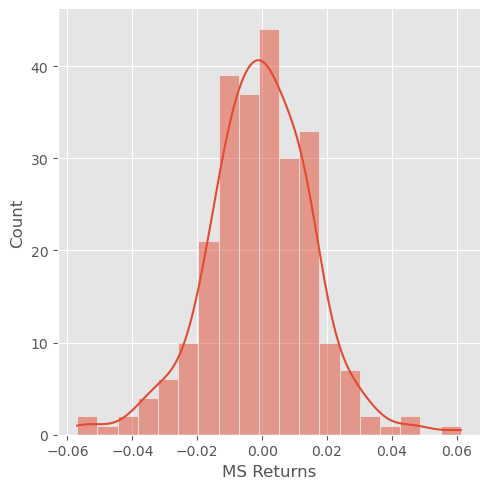

In [27]:
sns.displot(MS_15,kde=True)

In [28]:
#dist plot for Citi Group 2008 returns
CITI_08 = returns['C Returns']['2008-01-01':'2008-12-31']
CITI_08

Date
2008-01-02   -0.017663
2008-01-03    0.000346
2008-01-04   -0.023851
2008-01-07    0.000708
2008-01-08   -0.039632
                ...   
2008-12-24    0.039877
2008-12-26   -0.007375
2008-12-29   -0.023774
2008-12-30    0.035008
2008-12-31   -0.013235
Name: C Returns, Length: 253, dtype: float64

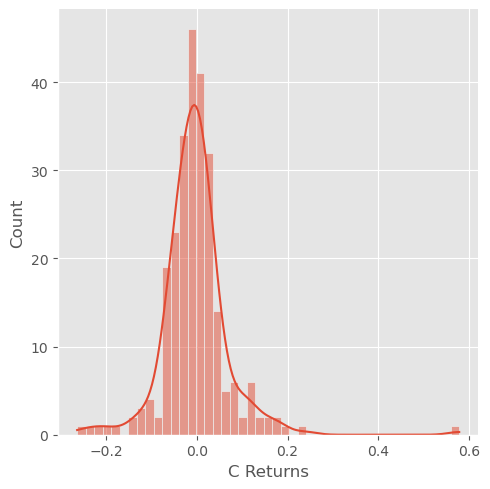

In [29]:
sns.displot(CITI_08,kde=True)

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

<Axes: xlabel='Date'>

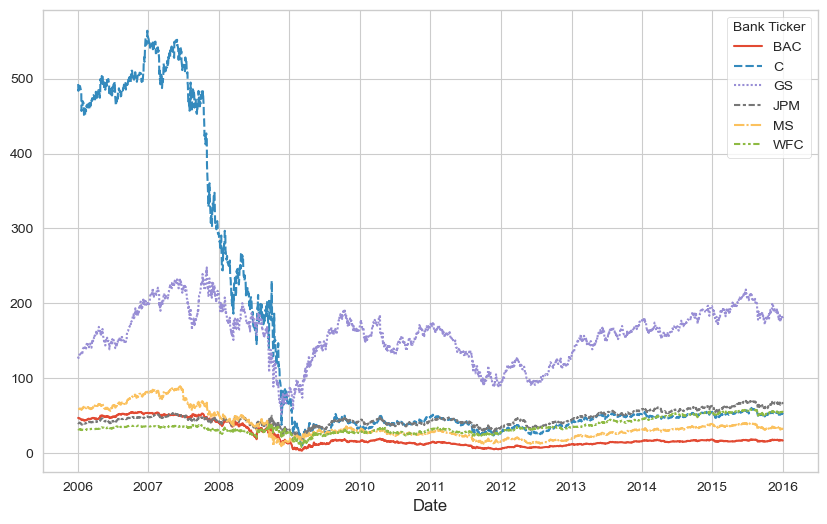

In [62]:
#line plot showing Close price for each bank for the entire index of time.
close_price = bank_stocks.xs(key='Close',axis=1,level='Stock Info')

#plot the close_price usnig sns
plt.figure(figsize=(10, 6))
sns.lineplot(close_price)

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [43]:
close_price['BAC']

Date
2006-01-03    47.080002
2006-01-04    46.580002
2006-01-05    46.639999
2006-01-06    46.570000
2006-01-09    46.599998
                ...    
2015-12-24    17.270000
2015-12-28    17.129999
2015-12-29    17.280001
2015-12-30    17.049999
2015-12-31    16.830000
Name: BAC, Length: 2517, dtype: float64

<Axes: xlabel='Date'>

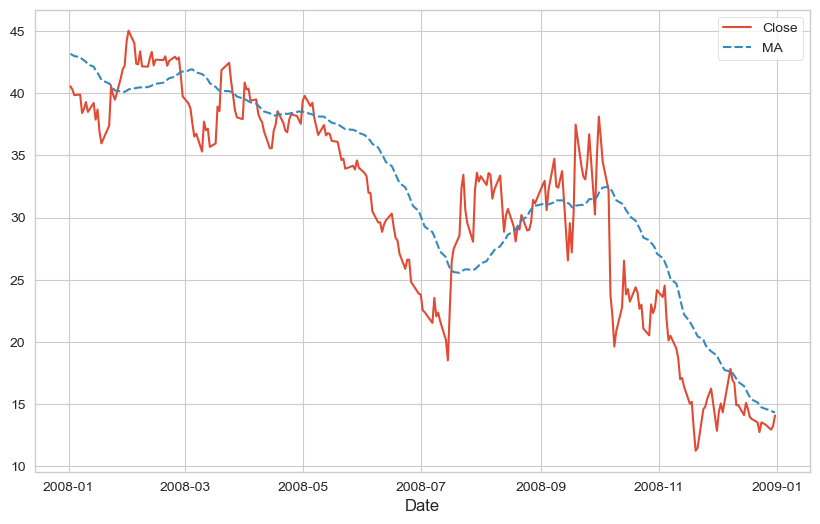

In [58]:
#extract the BoFa close price into separate df
BoFa = pd.DataFrame()
BoFa['Close'] = close_price['BAC']

#calculate the moving averages
BoFa['MA'] = BoFa['Close'].rolling(window=30).mean()

#plot the df for 2008
plt.figure(figsize=(10, 6))
sns.lineplot(BoFa['2008-01-01':'2008-12-31'])


In [63]:
close_price.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.080002,492.899994,128.869995,40.189999,58.310001,31.900000
2006-01-04,46.580002,483.799988,127.089996,39.619999,58.349998,31.530001
2006-01-05,46.639999,486.200012,127.040001,39.740002,58.509998,31.495001
2006-01-06,46.570000,486.200012,128.839996,40.020000,58.570000,31.680000
2006-01-09,46.599998,483.899994,130.389999,40.669998,59.189999,31.674999


<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

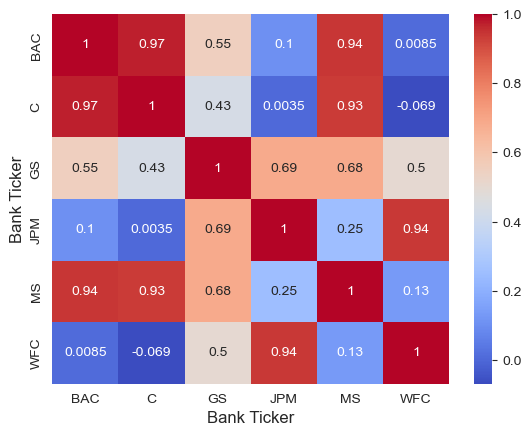

In [66]:
#create a heatmap of price correlations
sns.heatmap(close_price.corr(),cmap='coolwarm',annot=True)